In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st

# Project description
You work as an analyst for the telecom operator Megaline. The company
offers its clients two prepaid plans, Surf and Ultimate. The commercial
department wants to know which of the plans is more profitable in order to
adjust the advertising budget. <br>
You are going to carry out a preliminary analysis of the plans based on a
relatively small client selection. You'll have the data on 500 Megaline clients:
who the clients are, where they're from, which plan they use, and the number
of calls they made and text messages they sent in 2018. Your job is to analyze
clients' behavior and determine which prepaid plan is more profitable.

# Description of the plans
Remember! Megaline rounds seconds up to minutes, and megabytes to
gigabytes. For calls, each individual call is rounded up: even if the call lasted
just one second, it will be counted as one minute. For web traffic, individual
web sessions are not rounded up. Instead, the total for the month is rounded
up. If someone uses 1025 megabytes this month, they will be charged for 2
gigabyes. <br>
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes.
For calls, each individual call is rounded up: even if the call lasted just one
second, it will be counted as one minute. For web traffic, individual web
sessions are not rounded up. Instead, the total for the month is rounded up. If
someone uses 1025 megabytes this month, they will be charged for 2
gigabytes.

# Surf
1. Monthly charge 20 USD
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits
        * 1 minute 3 cents
        * 1 text message 3 cents
        * 1 GB of data 10 USD

# Ultimate
1. Monthly charge: 70 USD
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
         * 1 minute: 1 cent
         * 1 text message: 1 cent
         * 1 GB of data: 7 USD

# Step 1. Open the data file and study the general information

In [4]:
# open files and see brief description 

# data_users = pd.read_csv('/datasets/megaline_users.csv')
# data_calls = pd.read_csv('/datasets/megaline_calls.csv')
# data_messages = pd.read_csv('/datasets/megaline_messages.csv')
# data_internet = pd.read_csv('/datasets/megaline_internet.csv')
# data_plans = pd.read_csv('/datasets/megaline_plans.csv') 

# open files and see brief description 
data_users = pd.read_csv('datasets/megaline_users.csv')
data_calls = pd.read_csv('datasets/megaline_calls.csv')
data_messages = pd.read_csv('datasets/megaline_messages.csv')
data_internet = pd.read_csv('datasets/megaline_internet.csv')
data_plans = pd.read_csv('datasets/megaline_plans.csv') 

In [5]:
data_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [6]:
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [7]:
data_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [8]:
data_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
data_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
print('-----------USERS-----------')
data_users.info()
print()
print('-----------CALLS-----------')
data_calls.info()
print()
print('-----------MESSAGES-----------')
data_messages.info()
print()
print('-----------INTERNET-----------')
data_internet.info()
print()
print('-----------PLANS-----------')
data_plans.info()

-----------USERS-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

-----------CALLS-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), ob

## RESULTS STEP 1.
I read brief information about all the data. <br>
Glad to see that there is no empty data. From the first view data is really good. Naturally I'am going to do detailed review on the next steps. <br>
It is necessary to use pivot tables when I will show the final results.

# Step 2. Prepare the data
* Convert the data to the necessary types
* Find and eliminate errors in the data <br>
Explain what errors you found and how you eliminated them. <br><br>

For each user, find:
* The number of calls made and minutes used per month
* The number of text messages sent per month
* The volume of data per month
* The monthly profit from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

#### Step 2.1 Convert the data to the necessary types

In [11]:
# In **Data_users** convert *reg_date* from strings to date
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
# separate states
data_users['state'] = data_users['city']

# In **Data_users** convert *churn_date* from strings to date
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

# In **data_calls** convert *call_date* from strings to date
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

# In **data_messages** convert *message_date* from strings to date
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
  
# In **data_internet** convert *session_date* from strings to date
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')    

In [12]:
# year is the same in every row
# add month and weekday
data_users['reg_month'] = data_users['reg_date'].dt.month
data_users['reg_weekday'] = data_users['reg_date'].dt.weekday

#### Step 2.2 Find and eliminate errors in the data

**data_users**

In [13]:
data_users.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,reg_month,reg_weekday
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,"Atlanta-Sandy Springs-Roswell, GA MSA",12,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,"Seattle-Tacoma-Bellevue, WA MSA",8,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,"Las Vegas-Henderson-Paradise, NV MSA",10,6


In [14]:
# users id
print('Number of  unique user_id:', len(data_users['user_id'].unique()))
# That's good!

Number of  unique user_id: 500


Minimal age: 18
Maximal age: 75


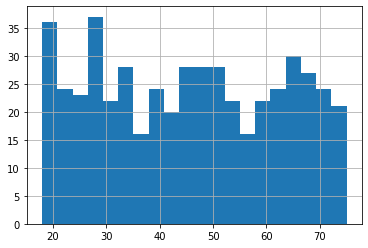

In [15]:
# age
print('Minimal age:',data_users['age'].min())
print('Maximal age:',data_users['age'].max())
data_users['age'].hist(bins=20)

It seems that this data is a representative of some global data. And selection of this data was made by age. <br>
Why? Usually distribution of age is not so uniform. <br>
Minimal age is 18. That is so because company can't sell their plans to children. <br>
IT is OK. It isn't a mistake.

In [16]:
# city; add state column
data_users['state'] = [item.split(' ')[-2] for item in data_users['city']]
data_users['state'].unique()

array(['GA', 'WA', 'NV', 'OK', 'TX', 'CA', 'MI', 'FL', 'OH', 'IL-IN-WI',
       'TN', 'NY-NJ-PA', 'PA', 'DC-VA-MD-WV', 'IN', 'NE-IA',
       'PA-NJ-DE-MD', 'AL', 'NC-SC', 'CO', 'NM', 'MA-NH', 'AZ', 'OR-WA',
       'OH-KY-IN', 'SC', 'NY', 'TN-MS-AR', 'KY-IN', 'RI-MA', 'UT', 'HI',
       'CT', 'LA', 'VA-NC', 'MD', 'WI', 'VA', 'MO-IL', 'MN-WI', 'MO-KS',
       'NC'], dtype=object)

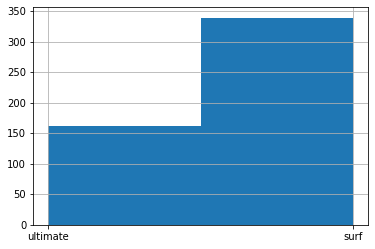

In [17]:
data_users['plan'].hist(bins=2)

In [18]:
data_users.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,reg_month,reg_weekday
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA,12,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,8,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV,10,6


**data_calls**

In [19]:
data_calls.head(3)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


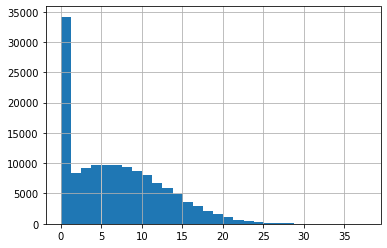

In [20]:
# duration
data_calls['duration'].hist(bins=30)

I see thar there are a lot of calls in the beginning if histogram. It could be zero or 0.5 or 1 and etc. <br>

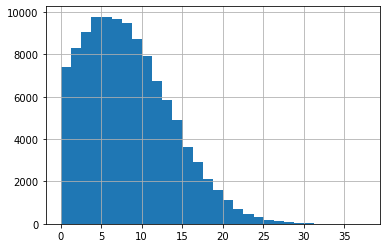

In [21]:
data_calls.query('duration != 0.')['duration'].hist(bins=30)

In [22]:
print('Share of data last in final data calls table (%): {:.2f}'.format(
                            len(data_calls.query('duration != 0.'))/len(data_calls) * 100))

Share of data last in final data calls table (%): 80.52


**data_messages** is OK

**data_internet** is OK

In [23]:
data_internet.head(3)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40


In [24]:
print('Share of data last in final data internet table (%): {:.2f}'.format(
                            len(data_internet.query('mb_used != 0.'))/len(data_internet) * 100))

Share of data last in final data internet table (%): 86.89


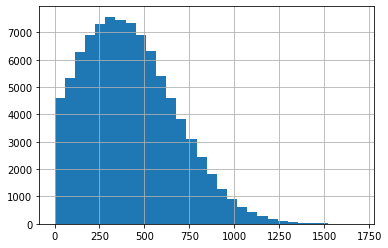

In [25]:
data_internet.query('mb_used != 0.')['mb_used'].hist(bins=30)

So, later I should member that there are a lot of garbage of 0-values in two tables.

#### Step 2.3 For each user, find:
* The number of calls made and minutes used per month
* The number of text messages sent per month
* The volume of data per month
* The monthly profit from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [26]:
# Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes.
# so before calculate new parameters, I should roundup minutes.
# As it is important to calculate this parameters for each month, I assign new columns.

In [27]:
# round up minutes and update column minutes

# def calls_minutes_update(row):
#     time = row['duration']
#     return np.ceil(time)

# data_calls['duration_round'] = data_calls.apply(calls_minutes_update, axis=1)

data_calls['duration_round'] = np.ceil(data_calls['duration'])

In [28]:
# save months
data_calls['month'] = data_calls['call_date'].dt.month

#### Mini result (pivot table 1 - calls):

In [29]:
# pivot table: calculate number of calls and minutes for each month
data_calls.query('duration != 0').pivot_table(index=['user_id','month'], values='duration_round', aggfunc=['count','sum'])

count            sum
              duration_round duration_round
user_id month                              
1000    12                16          124.0
1001    8                 22          182.0
        9                 38          315.0
        10                47          393.0
        11                49          426.0
...                      ...            ...
1498    12                32          339.0
1499    9                 35          346.0
        10                41          385.0
        11                39          308.0
        12                56          496.0

[2256 rows x 2 columns]

In [30]:
# pivot table: calculate number of calls and minutes for each month
data_pivot_calls = data_calls.query('duration != 0').pivot_table(index=['user_id','month'], values='duration_round', aggfunc=['count','sum'])

In [31]:
# messages
# create new column - month
data_messages['month'] = data_messages['message_date'].dt.month
data_messages.head(1)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12


#### Mini result (pivot table 2 - sms):

In [32]:
# pivot table: calculate number of calls and minutes for each month
data_messages.pivot_table(index=['user_id','month'], values='id', aggfunc=['count'])

count
                 id
user_id month      
1000    12       11
1001    8        30
        9        44
        10       53
        11       36
...             ...
1496    9        21
        10       18
        11       13
        12       11
1497    12       50

[1806 rows x 1 columns]

In [33]:
# pivot table: calculate number of calls and minutes for each month
data_pivot_sms = data_messages.pivot_table(index=['user_id','month'], values='id', aggfunc=['count'])

In [34]:
# internet
# I haven't rounded because Megaline rounds megabytes to gigabyte monthly
data_internet['month'] = data_internet['session_date'].dt.month
data_internet.head(1)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12


#### Mini result (pivot table 3 - internet):

In [35]:
(data_internet
    .query('mb_used != 0.')
    .pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['sum'])
)

sum
                mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [36]:
data_pivot_internet = (data_internet
     .pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['sum'])
 )

# # add column with Gb and round up it
# data_pivot_internet['gb_used'] = [np.ceil(item) for item in data_pivot_internet[('sum','mb_used')] / 1024.]

In [37]:
data_pivot_internet['gb_used'] = np.ceil(data_pivot_internet[('sum','mb_used')] / 1024)

In [38]:
data_pivot_internet.head()

sum gb_used
                mb_used        
user_id month                  
1000    12      1901.47     2.0
1001    8       6919.15     7.0
        9      13314.82    14.0
        10     22330.49    22.0
        11     18504.30    19.0

So, I have obtained 3 pivot tables. Now I can merge them.

In [39]:
# I choose outer because we should take into account all data
data_pivot_calls.merge(data_pivot_sms, left_index=True, right_index=True, how='outer')

count            sum count
              duration_round duration_round    id
user_id month                                    
1000    12              16.0          124.0  11.0
1001    8               22.0          182.0  30.0
        9               38.0          315.0  44.0
        10              47.0          393.0  53.0
        11              49.0          426.0  36.0
...                      ...            ...   ...
1498    12              32.0          339.0   NaN
1499    9               35.0          346.0   NaN
        10              41.0          385.0   NaN
        11              39.0          308.0   NaN
        12              56.0          496.0   NaN

[2290 rows x 3 columns]

Fantastic! It works!!!

In [40]:
# assing final dataframe, which I will analyse
df = data_pivot_calls.merge(data_pivot_sms, left_index=True, right_index=True, how='outer')

In [41]:
# merge with internet data
df = df.merge(data_pivot_internet, left_index=True, right_index=True, how='outer')

In [42]:
# change name of columns
df.columns = ['num_calls', 'min_calls_round','sms','mb', 'gb_round']

In [43]:
df

num_calls  min_calls_round   sms        mb  gb_round
user_id month                                                      
1000    12          16.0            124.0  11.0   1901.47       2.0
1001    8           22.0            182.0  30.0   6919.15       7.0
        9           38.0            315.0  44.0  13314.82      14.0
        10          47.0            393.0  53.0  22330.49      22.0
        11          49.0            426.0  36.0  18504.30      19.0
...                  ...              ...   ...       ...       ...
1498    12          32.0            339.0   NaN  23137.69      23.0
1499    9           35.0            346.0   NaN  12984.76      13.0
        10          41.0            385.0   NaN  19492.43      20.0
        11          39.0            308.0   NaN  16813.83      17.0
        12          56.0            496.0   NaN  22059.21      22.0

[2293 rows x 5 columns]

All necessary data are in pivot table. It is reall handy to use. <br>
Now is remained the most interesting. Let's calculate another's payments.
## I couldn't add plan using merge() or join() ((((
Try use another ways

In [44]:
# add column user id (now it is not an index)
#df['user_id'] = [id_row[0] for id_row in df.index]

#!@#$%

In [45]:
df = df.reset_index()

In [46]:
df

,user_id,month,num_calls,min_calls_round,sms,mb,gb_round
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,22.0,182.0,30.0,6919.15,7.0
2,1001,9,38.0,315.0,44.0,13314.82,14.0
3,1001,10,47.0,393.0,53.0,22330.49,22.0
4,1001,11,49.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1498,12,32.0,339.0,NaN,23137.69,23.0
2289,1499,9,35.0,346.0,NaN,12984.76,13.0
2290,1499,10,41.0,385.0,NaN,19492.43,20.0
2291,1499,11,39.0,308.0,NaN,16813.83,17.0


In [47]:
df = pd.merge(df, data_users[['user_id', 'plan', 'state']], on='user_id')

In [48]:
#df = pd.merge(df, data_plans, left_on='plan', right_on='plan_name')

In [49]:
df

,user_id,month,num_calls,min_calls_round,sms,mb,gb_round,plan,state
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,GA
1,1001,8,22.0,182.0,30.0,6919.15,7.0,surf,WA
2,1001,9,38.0,315.0,44.0,13314.82,14.0,surf,WA
3,1001,10,47.0,393.0,53.0,22330.49,22.0,surf,WA
4,1001,11,49.0,426.0,36.0,18504.30,19.0,surf,WA
...,...,...,...,...,...,...,...,...,...
2288,1498,12,32.0,339.0,NaN,23137.69,23.0,surf,NY-NJ-PA
2289,1499,9,35.0,346.0,NaN,12984.76,13.0,surf,FL
2290,1499,10,41.0,385.0,NaN,19492.43,20.0,surf,FL
2291,1499,11,39.0,308.0,NaN,16813.83,17.0,surf,FL


In [50]:
# create dictionary of plan name
# dictionary_plan = {'ultimate':[], 'surf':[]}
# for k,item in enumerate(data_users['user_id']):
#     if data_users.loc[k,'plan'] == 'ultimate':
#         dictionary_plan['ultimate'].append(item)
#     else:
#         dictionary_plan['surf'].append(item)

In [51]:
# new column 'plan' in df using dictionary and apply()
# def fun_plan_from_id(row):
#     user_id = row['user_id']
#     if user_id in dictionary_plan['ultimate']:
#         return 'ultimate'
#     else:
#         return 'surf'
    
# df['plan'] = df.apply(fun_plan_from_id, axis=1)

I don't think this is a good solution, but it works.

In [52]:
# the same thing I do with state

# create dictionary of states
# dictionary_states = {}

# # determine set of keys (states)
# for item in data_users['state'].unique():
#     if item not in dictionary_states.keys():
#         dictionary_states[item] = []

# # fill dictionary with values
# for k,item in enumerate(data_users['user_id']):
#     for key in dictionary_states.keys():
#         if data_users.loc[k,'state'] == key:
#             dictionary_states[key].append(item)
#             break
            
# # new column 'state' in df using dictionary and apply()
# def fun_state_from_id(row):
#     user_id = row['user_id']
    
#     for key in dictionary_states.keys():
#         if user_id in dictionary_states[key]:
#             return key
    
# df['state'] = df.apply(fun_state_from_id, axis=1)

In [53]:
df.head(3)

,user_id,month,num_calls,min_calls_round,sms,mb,gb_round,plan,state
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,GA
1,1001,8,22.0,182.0,30.0,6919.15,7.0,surf,WA
2,1001,9,38.0,315.0,44.0,13314.82,14.0,surf,WA


In [54]:
# new column 'pay' in df
def fun_payments(row):
    plan = row['plan']
    calls = row['min_calls_round']
    sms = row['sms']
    internet = row['gb_round']
    
    pay_total = 0
    # we have only two plans, so there is only two ways k = 0 or k = 1
    k_plan = 0
    if plan != data_plans.loc[k_plan,'plan_name']:
        k_plan = 1
        
    if sms > data_plans.loc[k_plan,'messages_included']:
        sms_excess = sms - data_plans.loc[k_plan,'messages_included']
        pay_total += sms_excess * data_plans.loc[k_plan,'usd_per_message']
        
    if internet > data_plans.loc[k_plan,'mb_per_month_included'] / 1024:
        internet_excess = internet - data_plans.loc[k_plan,'mb_per_month_included'] / 1024
        pay_total += internet_excess * data_plans.loc[k_plan,'usd_per_gb']
        
    if calls > data_plans.loc[k_plan,'minutes_included']:
        calls_excess = calls - data_plans.loc[k_plan,'minutes_included']
        pay_total += calls_excess * data_plans.loc[k_plan,'usd_per_minute']
        
    pay_total += data_plans.loc[k_plan,'usd_monthly_pay']
    
    return pay_total

df['pay'] = df.apply(fun_payments, axis=1)

C:\Users\tyala\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
C:\Users\tyala\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


In [55]:
df.head(10)

,user_id,month,num_calls,min_calls_round,sms,mb,gb_round,plan,state,pay
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,GA,70.00
1,1001,8,22.0,182.0,30.0,6919.15,7.0,surf,WA,20.00
2,1001,9,38.0,315.0,44.0,13314.82,14.0,surf,WA,20.00
3,1001,10,47.0,393.0,53.0,22330.49,22.0,surf,WA,90.09
4,1001,11,49.0,426.0,36.0,18504.30,19.0,surf,WA,60.00
5,1001,12,46.0,412.0,44.0,19369.18,19.0,surf,WA,60.00
6,1002,10,8.0,59.0,15.0,6552.01,7.0,surf,NV,20.00
7,1002,11,48.0,386.0,32.0,19345.08,19.0,surf,NV,60.00
8,1002,12,38.0,384.0,41.0,14396.24,15.0,surf,NV,20.00
9,1003,12,118.0,1104.0,50.0,27044.14,27.0,surf,OK,158.12


#### filter outliers, 3-sigma filter
I don't take into account filter mu - 3 * sigma, because it is a negative value <br>
Behavior of people, who using different plans, could be different, so I separate filters of these plans. In fact people who use ultimate plan can use much more internet, for example.

In [56]:
# calculate limits using formula mu + 3 * sigma for different packs and plans
str_plan = "surf"
str_action = 'min_calls_round'
limit_min_surf = df.query('plan == @str_plan')[str_action].mean() + 3 * df.query('plan == @str_plan')[str_action].std()
str_plan = "ultimate"
str_action = 'min_calls_round'
limit_min_ultimate = df.query('plan == @str_plan')[str_action].mean() + 3 * df.query('plan == @str_plan')[str_action].std()

str_plan = "surf"
str_action = 'sms'
limit_sms_surf = df.query('plan == @str_plan')[str_action].mean() + 3 * df.query('plan == @str_plan')[str_action].std()
str_plan = "ultimate"
str_action = 'sms'
limit_sms_ultimate = df.query('plan == @str_plan')[str_action].mean() + 3 * df.query('plan == @str_plan')[str_action].std()

str_plan = "surf"
str_action = 'gb_round'
limit_internet_surf = df.query('plan == @str_plan')[str_action].mean() + 3 * df.query('plan == @str_plan')[str_action].std()
str_plan = "ultimate"
str_action = 'gb_round'
limit_internet_ultimate = df.query('plan == @str_plan')[str_action].mean() + 3 * df.query('plan == @str_plan')[str_action].std()

In [57]:
# create filtered dataframe
df_final = df.query(' (min_calls_round <= @limit_min_surf & plan == "surf" or \
           min_calls_round <= @limit_min_ultimate & plan == "ultimate" or \
           min_calls_round!=min_calls_round) and \
           (sms <= @limit_sms_surf & plan == "surf" or \
           sms <= @limit_sms_ultimate & plan == "ultimate" or \
           sms!=sms) and \
           (gb_round <= @limit_internet_surf & plan == "surf" or \
           gb_round <= @limit_internet_ultimate & plan == "ultimate" or \
           sms!=sms)')

In [58]:
print('Remained number of rows (%): {:.1f}'.format(len(df_final) / len(df) * 100))

Remained number of rows (%): 96.9


## RESULTS STEP 2.
I prepared data: convered and detected empty values in initial data-tables. <br>
I have constructed pivot table that provides information about costs for each user for each month. <br>
I have removed outliers from pivot table by calls, messages and internet.

# Step 3. Analyze the data
Describe the customers' behavior. Find the minutes, texts, and volume of data
the users of each plan require per month. Calculate the mean, dispersion, and
standard deviation. Plot histograms. Describe the distributions.

In [59]:
# Every month each user do some calls.
print('Average number of calls:',df_final['num_calls'].mean())

Average number of calls: 48.05850091407678


In [60]:
print('We have rows in df:',len(df_final))

We have rows in df: 2222


In this Step 3 I'm going to analyse set of this samples. <br>
In the next step we can calculate mean and standard deviation to describe this distributions.

#### CALLS

Plan surf - min_calls_round
Average: 427.83
Standard deviation: 215.83
Dispersion: 46583.64
How many people use 500 minutes: 63%


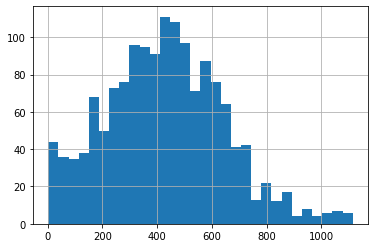

In [61]:
# now we assume that number of minutes used every month is a random variable.
# plan: surf
str_plan = "surf"
str_action = 'min_calls_round'
df_final.query('plan == @str_plan')[str_action].hist(bins=30)    # all data
print('Plan ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()**2))

minutes_in_surf = 500
mu = df_final.query('plan == @str_plan')[str_action].mean()
std = df_final.query('plan == @str_plan')[str_action].std()
result = st.norm(mu,std).cdf(minutes_in_surf)
print('How many people use {:.0f} minutes: {:.0%}'.format(minutes_in_surf,result))

Plan ultimate - min_calls_round
Average: 422.86
Standard deviation: 217.79
Dispersion: 47433.05
How many people use 500 minutes: 64%


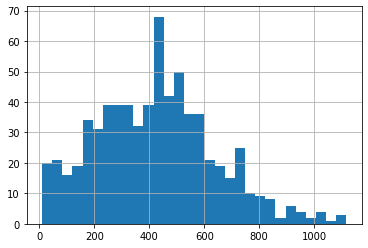

In [62]:
# plan: ultimate
str_plan = "ultimate"
str_action = 'min_calls_round'
df_final.query('plan == @str_plan')[str_action].hist(bins=30)    # all data
print('Plan ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()**2))

minutes_in_surf = 500
mu = df_final.query('plan == @str_plan')[str_action].mean()
std = df_final.query('plan == @str_plan')[str_action].std()
result = st.norm(mu,std).cdf(minutes_in_surf)
print('How many people use {:.0f} minutes: {:.0%}'.format(minutes_in_surf,result))

#### Mini results:
'How many minutes do the users of each of the plans require per month?
1. Users of both plans use in average in between ~425 minutes. 
2. Moreover standard deviation is the same for both plans ~ 216.
3. Surf plan includes 500 minutes. I calculated number of people who used 500 minutes: ~63%. So 37% of people in surf plan pay exceed dollars.
4. Distribution is close to normal distribution with negative skew.
5. Some people could not use their minutes. Maybe they use internet. Maybe those people just connected to the operator. In fact it is better to filter people who are became a user in the last 15-20 days. It could decrease number of minutes in some months.

#### MESSAGES

Plan surf - sms
Average: 37.51
Standard deviation: 28.06
Dispersion: 787.30
How many people use 50 sms: 67%


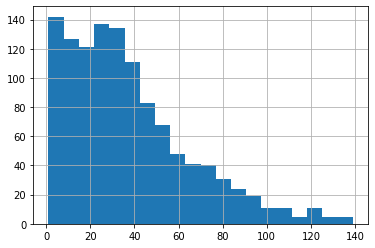

In [63]:
# now we assume that number of sms used every month is a random variable.
# plan: surf
str_plan = "surf"
str_action = 'sms'
df_final.query('plan == @str_plan')[str_action].hist(bins=20)    # all data
print('Plan ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()**2))

minutes_in_surf = 50
mu = df_final.query('plan == @str_plan')[str_action].mean()
std = df_final.query('plan == @str_plan')[str_action].std()
result = st.norm(mu,std).cdf(minutes_in_surf)
print('How many people use {:.0f} sms: {:.0%}'.format(minutes_in_surf,result))

Plan ultimate - sms
Average: 43.91
Standard deviation: 29.95
Dispersion: 896.82
How many people use 50 sms: 58%


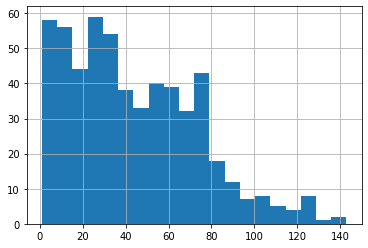

In [64]:
# plan: ultimate
str_plan = "ultimate"
str_action = 'sms'
df_final.query('plan == @str_plan')[str_action].hist(bins=20)    # all data
print('Plan ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()**2))

minutes_in_surf = 50
mu = df_final.query('plan == @str_plan')[str_action].mean()
std = df_final.query('plan == @str_plan')[str_action].std()
result = st.norm(mu,std).cdf(minutes_in_surf)
print('How many people use {:.0f} sms: {:.0%}'.format(minutes_in_surf,result))

#### Mini results:
'How many SMS do the users of each of the plans require per month?
1. SMS distributions don't look like a normal distribution. It is because many of people don't use messsages at all.
2. Distributionы looks like a Poisson distribution but it is normal. In comparison of the last parameter (minutes), the number of messages is a descrete parameter.
3. Users of ultimate plan use more messages than surf users. ~44 vs ~37. Standard deviations are close ~ 29.
4. Only 67% os surf users use only their limit per month.
5. 1000 text messages in unlimited plan are more than sufficient. Even 150 sms is enough for all. But it could a marketing trick to attract new clients. 

#### INTERNET

Plan surf - gb_round
Average: 16.54
Standard deviation: 7.25
Dispersion: 52.53
How many people use 15 Gb: 42%


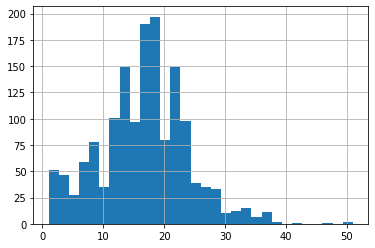

In [65]:
# now we assume that number of Gb used every month is a random variable.
# plan: surf
str_plan = "surf"
str_action = 'gb_round'
df_final.query('plan == @str_plan')[str_action].hist(bins=30)    # all data
print('Plan ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()**2))

Gb_in_surf = 15
mu = df_final.query('plan == @str_plan')[str_action].mean()
std = df_final.query('plan == @str_plan')[str_action].std()
result = st.norm(mu,std).cdf(Gb_in_surf)
print('How many people use {:.0f} Gb: {:.0%}'.format(Gb_in_surf,result))

Plan ultimate - gb_round
Average: 17.08
Standard deviation: 7.47
Dispersion: 55.82
How many people use 30 Gb: 96%


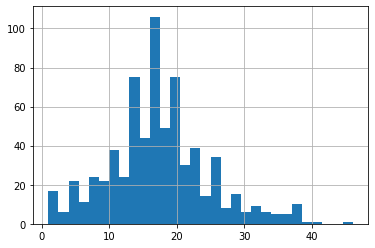

In [66]:
# plan: ultimate
str_plan = "ultimate"
str_action = 'gb_round'
df_final.query('plan == @str_plan')[str_action].hist(bins=30)    # all data
print('Plan ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()**2))

Gb_in_surf = 30
mu = df_final.query('plan == @str_plan')[str_action].mean()
std = df_final.query('plan == @str_plan')[str_action].std()
result = st.norm(mu,std).cdf(Gb_in_surf)
print('How many people use {:.0f} Gb: {:.0%}'.format(Gb_in_surf,result))

#### Mini results:
How many the volume of web traffic do the users of each of the plans require per month?
1. Internet is the most interesting thing because users of both plans reach their limits
2. It has normal distribution. Standard deviation is less than for minutes.
3. In average surf-users need 16.5 Gb vs ultim-users need 17.0 Gb. Standard deviation ~7.3 Gb.
4. 30 Gb in ultimate plan used by 96% of users not 99. But it is enough for the most of people. 

# Results Step 3.
I have calculated parameters of distribution and gave a charachteristic of this distribution. <br>
Many of people don't use messages, so this distribution is the most skewed. <br>
Surprising people in average use nearly the same number of minutes, sms and Gb. <br>

<div class="alert alert-danger">
    You need to add an explicit answer to the question: 'How many minutes and SMS and the volume of web traffic do the users of each of the plans require per month?' Also would be really great if you described the histograms some more than just 'the data is skewed'.<br>
    Sidenote: while 'dispersion deviation' might be a thing, you probably meant just 'dispersion' or 'variance'.
</div>

**Tagir: corrected. I added answer for this question right after plotting and I described in details this histograms. Could you give me a clue how to do it better?**


# Step 4. Test the hypotheses
* The average profit from users of Ultimate and Surf calling plans differs.
* The average profit from users in NY-NJ area is different from that of the users from other regions. <br>
You decide what alpha value to use. <br>
Explain:
* How you formulated the null and alternative hypotheses.
* What criterion you used to test the hypotheses and why.

The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget. <br>
PROFIT is a MONEY. First of all I should calculate how many payments there are. 

Plan surf - pay
Average: 58.21
Standard deviation: 48.94
Dispersion: 2395.31


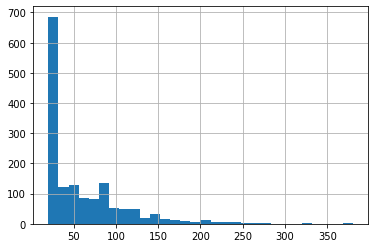

In [67]:
# now we assume that number of Gb used every month is a random variable.
# plan: surf
str_plan = "surf"
str_action = 'pay'
df_final.query('plan == @str_plan')[str_action].hist(bins=30)    # all data
print('Plan ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()**2))

Many of people pay more than they have in plan. Std is high

Plan ultimate - pay
Average: 71.97
Standard deviation: 9.69
Dispersion: 93.84


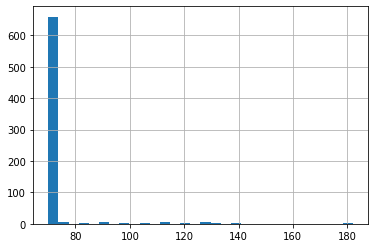

In [68]:
# plan: ultimate
str_plan = "ultimate"
str_action = 'pay'
df_final.query('plan == @str_plan')[str_action].hist(bins=30)    # all data
print('Plan ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('plan == @str_plan')[str_action].std()**2))

std is low, that means that people don't exceed on their plans.

In [69]:
# null: test the hypothesis that the means of the two statistical populations are equal based on samples taken from them
# alternative: there are not equal

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        df_final.query('plan == "surf"')['pay'], 
        df_final.query('plan == "ultimate"')['pay'],
        equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  3.2405422145762677e-25
We reject the null hypothesis


In [70]:
# calculate share of 'surf' users who pays more than 70 USD
mu = 60.71
std = 55.39
result = 1 - st.norm(mu,std).cdf(70)
print('share of surf-plan users who pays more than 70 USD:',result)


share of surf-plan users who pays more than 70 USD: 0.4334018573728883


#### state NY-NJ
I don't exact;y know what does it mean @NY-NJ area. So I take into account all places included NY and NJ

State NY - pay
Average: 60.14
Standard deviation: 43.97
Dispersion: 1933.03


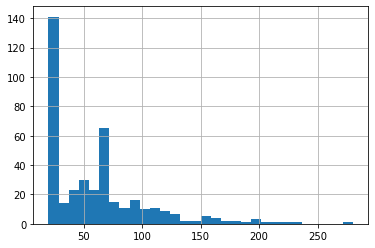

In [71]:
str_plan = "NY"
str_action = 'pay'
df_final.query('state == @str_plan or state == "NY-NJ-PA"')[str_action].hist(bins=30)    # all data
print('State ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('state == @str_plan or state == "NY-NJ-PA"')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('state == @str_plan or state == "NY-NJ-PA"')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('state == @str_plan or state == "NY-NJ-PA"')[str_action].std()**2))

State NY - pay
Average: 63.05
Standard deviation: 40.80
Dispersion: 1665.02


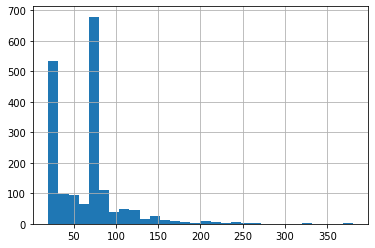

In [72]:
str_plan = "NY"
str_action = 'pay'
df_final.query('not(state == @str_plan or state == "NY-NJ-PA")')[str_action].hist(bins=30)    # all data
print('State ' + str_plan + ' - ' + str_action)
print('Average: {:.2f}'.format(df_final.query('not(state == @str_plan or state == "NY-NJ-PA")')[str_action].mean()))
print('Standard deviation: {:.2f}'.format(df_final.query('not(state == @str_plan or state == "NY-NJ-PA")')[str_action].std()))
print('Dispersion: {:.2f}'.format(df_final.query('not(state == @str_plan or state == "NY-NJ-PA")')[str_action].std()**2))

In [73]:
# null: test the hypothesis that the means of the two statistical populations are equal based on samples taken from them
# alternative: there are not equal

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        df_final.query('state == @str_plan or state == "NY-NJ-PA"')['pay'], 
        df_final.query('not(state == @str_plan or state == "NY-NJ-PA")')['pay'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.20272110179646383
We can't reject the null hypothesis


We can't reject hypothesis. So locally more likely payments doesn't differ.

# Results Step 4.
So, these plans have different profits. <br>
hypothesis about states can't be rejected. 

# Step 5. Write an overall conclusion

I have prepared a lot of pivot table and have done statistical analysis. <br>
The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget. <br>
The answer is that ultimate plan is more profitable. It is so due to several factors:
1. Exceed payments in surf plan is too low to make this plan more profitable than ultimate. Although a lot of people ~36% use exceed calls/sms or internet packs. Increase of payment of additional internet could give for profit than increase of minutes and sms. Maybe it could be a good idea to increase cost of additional Gb.
2. People have the same behaviour of their call, messages and internet use. It is easier to change plans than change people behaviour.
3. Monthly payments in ultimate plan is higher on 50 USD.